# Setup
## Imports

In [103]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import matplotlib.pyplot as plt
import json
import pandas as pd

from generative_social_choice.utils.helper_functions import get_base_dir_path
from generative_social_choice.slates.voting_utils import gini
from generative_social_choice.ratings.utility_matrix import extract_voter_utilities_from_info_csv
from generative_social_choice.utils.postprocessing import (
    plot_sorted_utility_distributions,
    plot_likert_category_clustered_bar_chart,
    scalar_utility_metrics,
    plot_candidate_distribution_stacked,
    
)


## Load data

In [105]:
from generative_social_choice.utils.helper_functions import get_results_paths

LABELLING_MODEL = "4o-mini"

baseline_result_dirs = get_results_paths(labelling_model="4o", baseline=True,  embedding_type="seed_statement")
baseline_result_dirs

{'utility_matrix_file': WindowsPath('C:/Users/aaron/NTFS/dev/generative_social_choice/generative_social_choice/data/utility_matrix_results/baseline/4o_for_labelling/baseline_utility_matrix.csv'),
 'statement_id_file': WindowsPath('C:/Users/aaron/NTFS/dev/generative_social_choice/generative_social_choice/data/utility_matrix_results/baseline/4o_for_labelling/baseline_utility_matrix_statements.csv'),
 'assignments': WindowsPath('C:/Users/aaron/NTFS/dev/generative_social_choice/generative_social_choice/data/utility_matrix_results/baseline/4o_for_labelling/baseline_assignments.json')}

In [106]:
baseline_assignments_file_path = baseline_result_dirs["assignments"]

with open(baseline_assignments_file_path, "r") as f:
    baseline_assignment_data = (json.load(f))


baseline_assignment_data.keys()


dict_keys(['slate', 'slate_statements', 'agent_ids', 'assignments', 'utilities', 'info'])

In [107]:
# Create DataFrame with assignments and utilities
baseline_assignments = pd.DataFrame({
    'candidate_id': baseline_assignment_data['assignments'],
    'utility': baseline_assignment_data['utilities']
}, index=baseline_assignment_data['agent_ids'])
baseline_assignments.head()


,candidate_id,utility
generation1,s1,3.875477
generation2,s2,3.891122
generation3,s4,3.922493
generation4,s1,3.940659
generation5,s5,3.914099


In [108]:
algo_assignment_result_dir = get_base_dir_path() / "data" / "demo_data" / "assignments"
algo_assignment_files = {
    path.stem: path for path in algo_assignment_result_dir.glob("*.json")
}

utilities = pd.DataFrame(columns=algo_assignment_files.keys(), index=baseline_assignments.index)
utilities["Baseline"] = baseline_assignments["utility"]
# utilities["Baseline OpenAI Emb."] = df_bjr_with_openai_embeddings["utility"]
utilities.head(10)


,exact,greedy,lp,"Phragmen(marginal_previous, clear=False, redist=False)","Phragmen(marginal_previous, clear=False, redist=True)","Phragmen(marginal_previous, clear=True, redist=False)","Phragmen(marginal_previous, clear=True, redist=True)","Phragmen(marginal_slate, clear=False, redist=False)","Phragmen(marginal_slate, clear=False, redist=True)","Phragmen(marginal_slate, clear=True, redist=False)","Phragmen(marginal_slate, clear=True, redist=True)",Baseline
generation1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875477
generation2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.891122
generation3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.922493
generation4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.940659
generation5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.914099
generation6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.934762
generation7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.954626
generation8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925924
generation9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.680190
generation10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.908748


In [109]:
utilities.iloc[:, :2].isna().value_counts()

exact  greedy
True   True      100
Name: count, dtype: int64

In [110]:


algo_assignments = pd.DataFrame(columns=list(algo_assignment_files.keys()), index=baseline_assignments.index)

for algo_name, file_path in algo_assignment_files.items():
    with open(file_path, "r") as f:
        algo_assignment_data = (json.load(f))
        algo_utilities = pd.Series(algo_assignment_data['utilities'], index=algo_assignment_data['agent_ids'])
        utilities[algo_name] = algo_utilities
        cur_algo_assignments = pd.Series(algo_assignment_data['assignments'], index=algo_assignment_data['agent_ids'])
        algo_assignments[algo_name] = cur_algo_assignments

algo_assignments["Baseline"] = baseline_assignments["candidate_id"]


algo_assignments.head()


,exact,greedy,lp,"Phragmen(marginal_previous, clear=False, redist=False)","Phragmen(marginal_previous, clear=False, redist=True)","Phragmen(marginal_previous, clear=True, redist=False)","Phragmen(marginal_previous, clear=True, redist=True)","Phragmen(marginal_slate, clear=False, redist=False)","Phragmen(marginal_slate, clear=False, redist=True)","Phragmen(marginal_slate, clear=True, redist=False)","Phragmen(marginal_slate, clear=True, redist=True)",Baseline
generation1,s9,s9,s9,s9,s9,s9,s9,s9,s9,s9,s9,s1
generation2,s9,s9,s9,s9,s9,s9,s9,s9,s9,s9,s9,s2
generation3,s13,s13,s13,s13,s13,s13,s13,s13,s13,s13,s13,s4
generation4,s38,s38,s38,s38,s38,s38,s38,s38,s38,s38,s38,s1
generation5,s38,s38,s38,s38,s38,s38,s38,s38,s38,s38,s38,s5


# Plots & Tables

## Voting Algorithm Comparison

### Tables

In [111]:
scalar_utility_metrics(utilities)

,Avg_Utility,Min_Utility,25th_Pctile_Utility,Gini
exact,3.765395,2.101765,3.664983,0.039055
greedy,3.762519,2.101765,3.648009,0.039214
lp,3.765395,2.101765,3.664983,0.039055
"Phragmen(marginal_previous, clear=False, redist=False)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_previous, clear=False, redist=True)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_previous, clear=True, redist=False)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_previous, clear=True, redist=True)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_slate, clear=False, redist=False)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_slate, clear=False, redist=True)",3.762519,2.101765,3.648009,0.039214
"Phragmen(marginal_slate, clear=True, redist=False)",3.762519,2.101765,3.648009,0.039214


### Plots

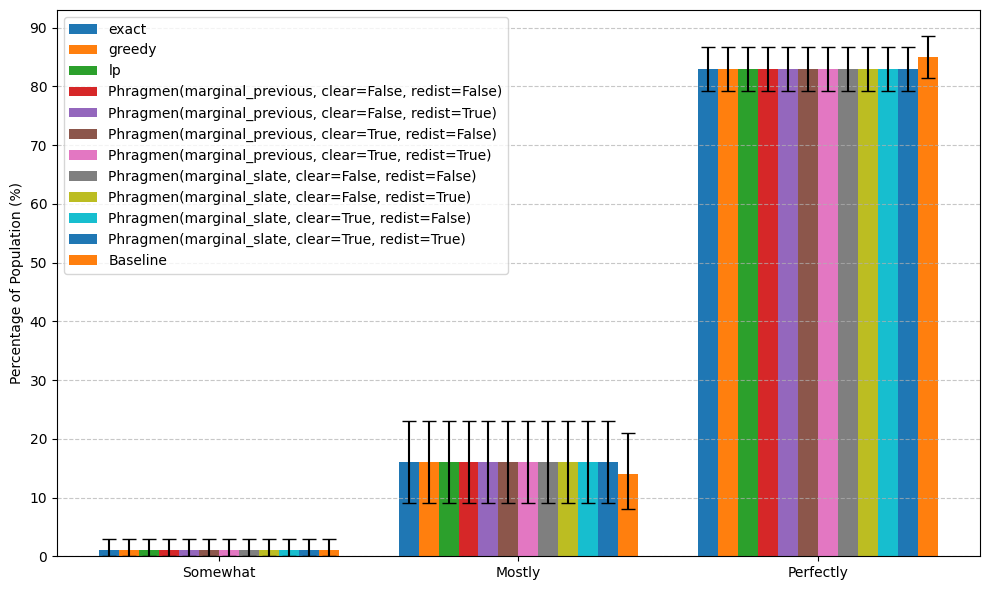

In [112]:
fig = plot_likert_category_clustered_bar_chart(utilities)

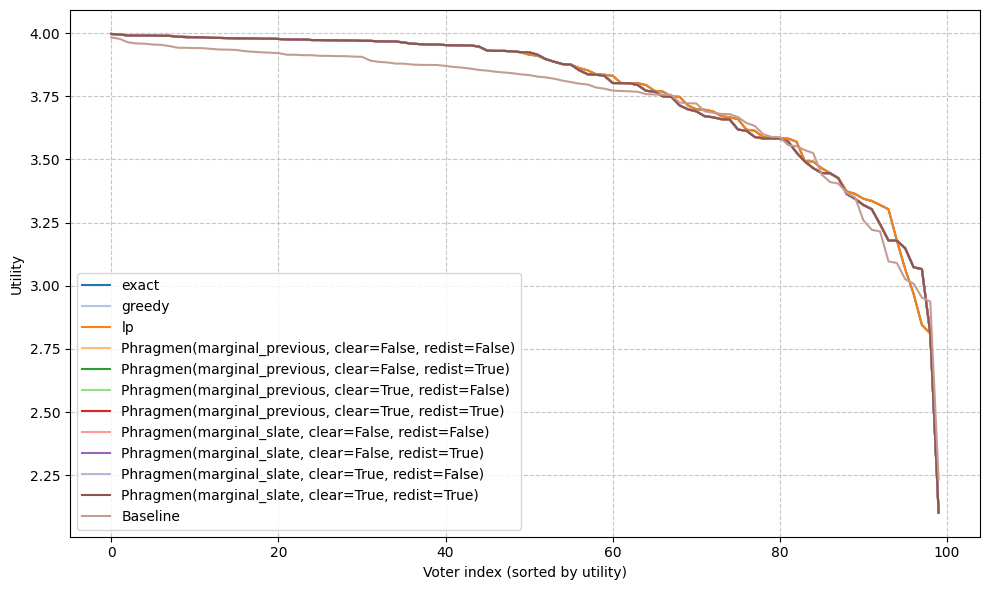

In [113]:
fig = plot_sorted_utility_distributions(utilities)

In [114]:
# embeddings_comparison_fig = plot_sorted_utility_distributions(utilities.loc[:,["Baseline", "Baseline OpenAI Emb."]])

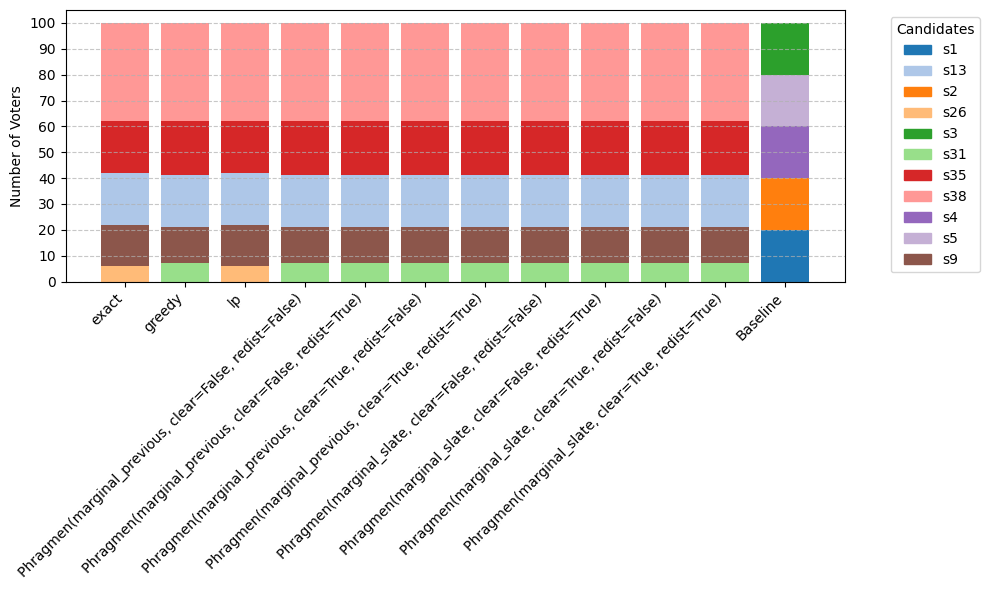

In [115]:
fig = plot_candidate_distribution_stacked(algo_assignments)